1. Download the data from the file data source and provide possible data insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv(r"C:\Users\User\Downloads\complaints.csv\complaints.csv")

# Select random 5,000 rows
df = df.sample(n=5000, random_state=42)

# Convert Date Format
df['Date received'] = pd.to_datetime(df['Date received'])

# Handle Missing Values
df.fillna('', inplace=True)  # Fill missing values with empty strings for now

# Normalize Text Data
text_columns = ['Product', 'Sub-product', 'Issue', 'Sub-issue']
for col in text_columns:
    df[col] = df[col].str.lower()

# Convert Categorical Columns
categorical_columns = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'State', 'Submitted via']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Parse Dates
date_columns = ['Date received', 'Date sent to company']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_11236\3559429905.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\User\Downloads\complaints.csv\complaints.csv")


        Date received                                            Product  \
2259864    2022-12-09  credit reporting, credit repair services, or o...   
172769     2024-05-03  credit reporting or other personal consumer re...   
3313087    2022-09-07                        credit card or prepaid card   
5167879    2022-12-01                        checking or savings account   
1822484    2019-01-09  credit reporting, credit repair services, or o...   

               Sub-product                                 Issue  \
2259864   credit reporting           improper use of your report   
172769    credit reporting  incorrect information on your report   
3313087  store credit card  incorrect information on your report   
5167879   checking account                   managing an account   
1822484   credit reporting  incorrect information on your report   

                                             Sub-issue  \
2259864  reporting company used your report improperly   
172769            

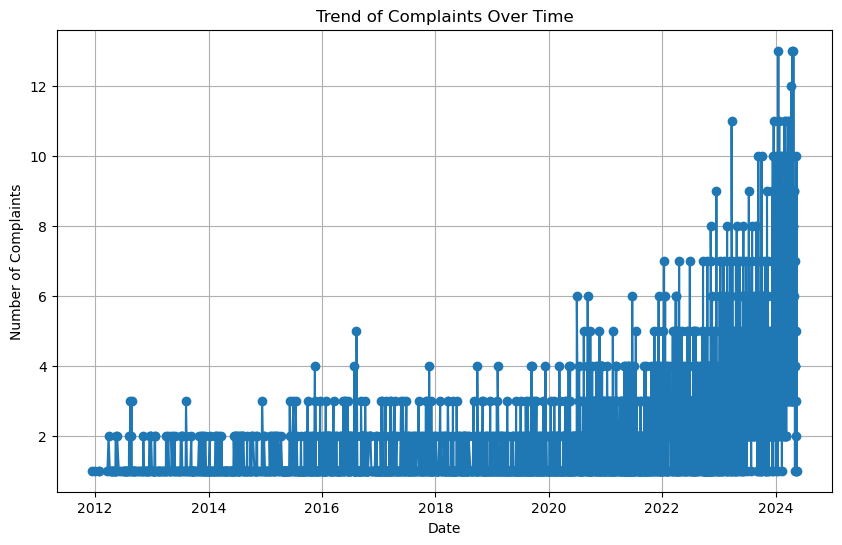

In [73]:
# Trend of Complaints Over Time

# Group by date and count the number of complaints for each date
complaints_over_time = df.groupby('Date received').size()

### Line chart to show the trend of complaints over time 
plt.figure(figsize=(10, 6))
plt.plot(complaints_over_time.index, complaints_over_time.values, marker='o', linestyle='-')
plt.title('Trend of Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()

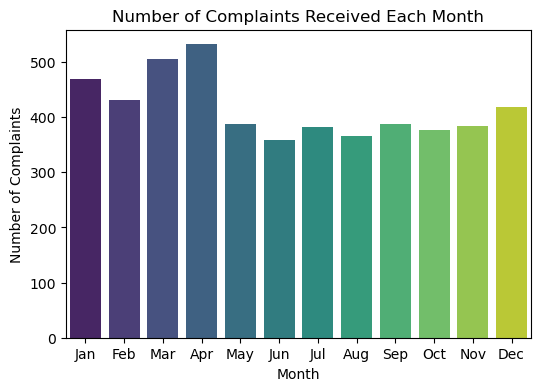

In [74]:
# Number of Complaints Received Each Month

df['Month'] = df['Date received'].dt.month

# Group by month and count the number of complaints
monthly_complaints = df.groupby('Month').size().reset_index(name='Complaint Count')

# Visualize the complaint by month
plt.figure(figsize=(6, 4))
sns.barplot(x='Month', y='Complaint Count', data=monthly_complaints, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints Received Each Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

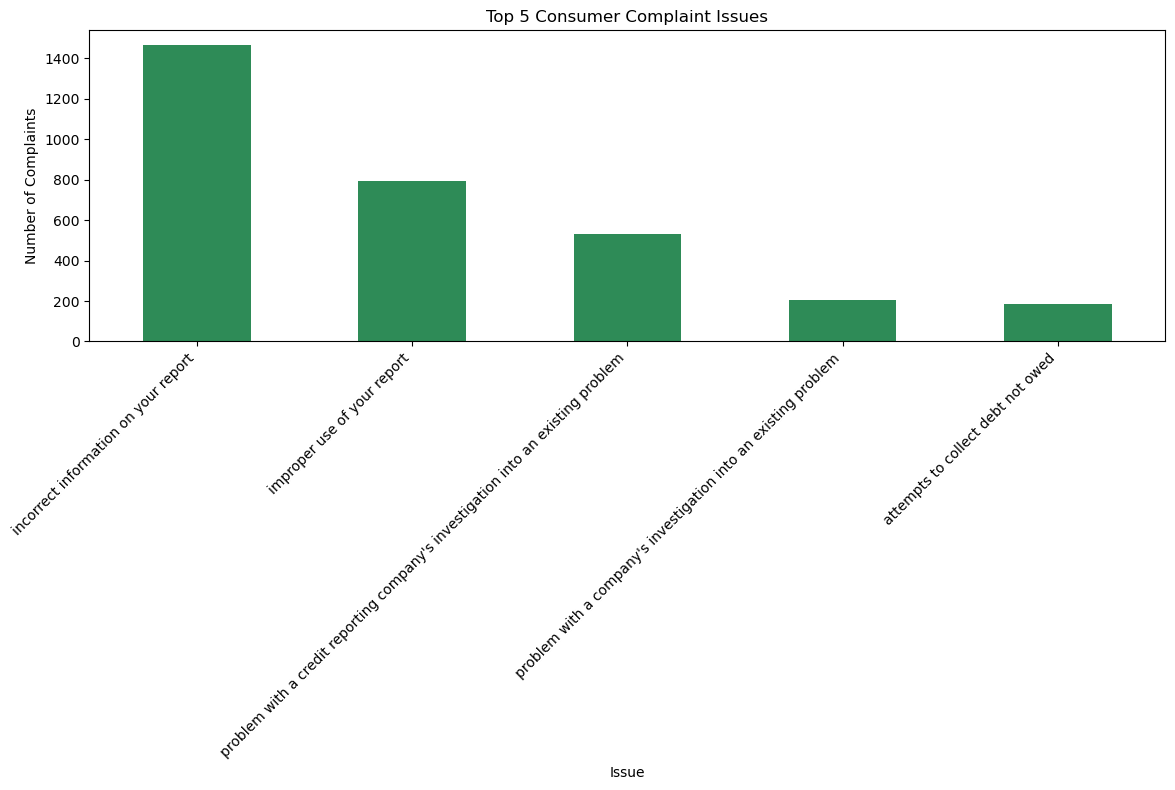

In [101]:
# Top 5 Consumer Complaint Issues

# Group data by 'Issue' and count occurrences and then sort
issue_counts = df['Issue'].value_counts().sort_values(ascending=False)

# Select top 5 issues
top_5_issues = issue_counts.head(5)

# Create bar plot
plt.figure(figsize=(12, 8))
top_5_issues.plot(kind='bar', color='seagreen')
plt.title('Top 5 Consumer Complaint Issues')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Company')

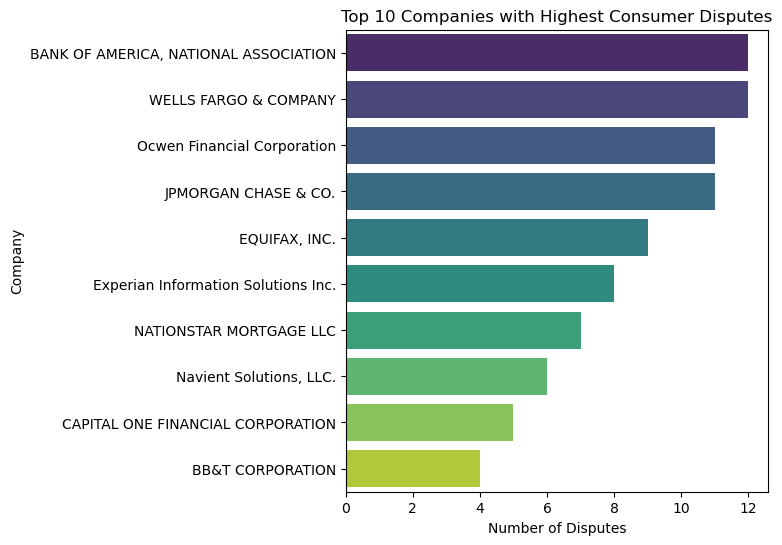

In [102]:
# Top 10 Companies with Highest Consumer Disputes

# Filter out rows with missing values
df = df.dropna(subset=['Consumer disputed?', 'Company response to consumer'])

# Group by 'Company' and count the number of disputes for each company
company_disputes = df[df['Consumer disputed?'] == 'Yes']['Company'].value_counts().head(10)

# Group by 'Company' and 'Company response to consumer' and count the number of responses for each combination
response_counts = df.groupby(['Company', 'Company response to consumer']).size().unstack(fill_value=0)
# Calculate the percentage of each response type for each company
response_percentages = response_counts.div(response_counts.sum(axis=1), axis=0).reset_index()

# Filter the response percentages for the top 10 companies with the highest dispute rates
top_companies_response_percentages = response_percentages[response_percentages['Company'].isin(company_disputes.index)]

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=company_disputes.values, y=company_disputes.index, palette='viridis')
plt.title('Top 10 Companies with Highest Consumer Disputes')
plt.xlabel('Number of Disputes')
plt.ylabel('Company')

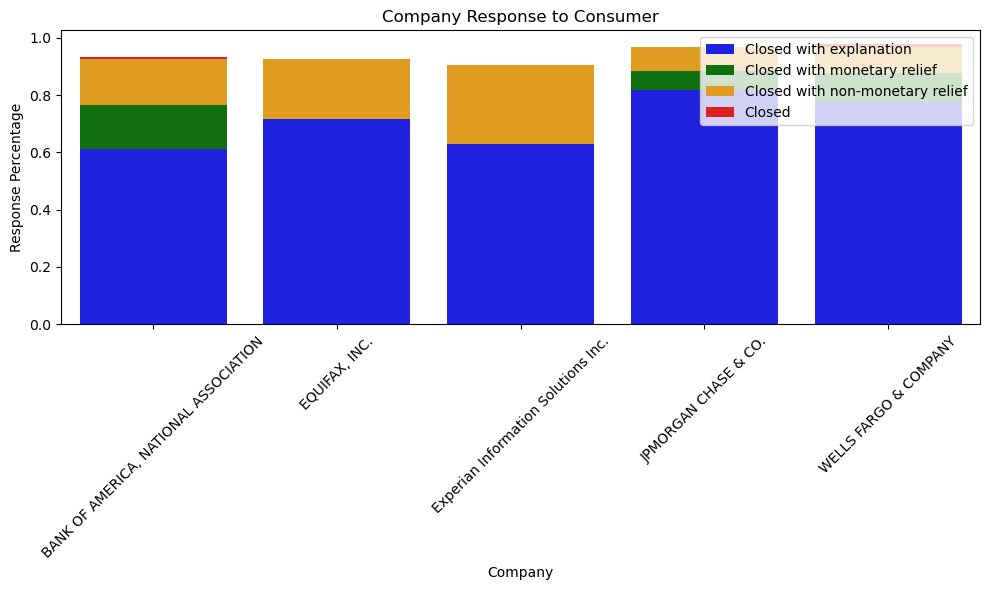

In [7]:
# Response of the Top 5 Companies with Highest Disputes 

# Filter out rows with missing values
df = df.dropna(subset=['Consumer disputed?', 'Company response to consumer'])

# Group by 'Company' and count the number of disputes for each company
company_disputes = df[df['Consumer disputed?'] == 'Yes']['Company'].value_counts().head(5)

# Group by 'Company' and 'Company response to consumer' and count the number of responses for each combination
response_counts = df.groupby(['Company', 'Company response to consumer']).size().unstack(fill_value=0)
# Calculate the percentage of each response type for each company
response_percentages = response_counts.div(response_counts.sum(axis=1), axis=0).reset_index()

# Filter the response percentages for the top 5 companies with the highest dispute rates
top_companies_response_percentages = response_percentages[response_percentages['Company'].isin(company_disputes.index)]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies_response_percentages, x='Company', y='Closed with explanation', color='blue', label='Closed with explanation')
sns.barplot(data=top_companies_response_percentages, x='Company', y='Closed with monetary relief', color='green', label='Closed with monetary relief', bottom=top_companies_response_percentages['Closed with explanation'])
sns.barplot(data=top_companies_response_percentages, x='Company', y='Closed with non-monetary relief', color='orange', label='Closed with non-monetary relief', bottom=top_companies_response_percentages['Closed with explanation'] + top_companies_response_percentages['Closed with monetary relief'])
sns.barplot(data=top_companies_response_percentages, x='Company', y='Closed', color='red', label='Closed', bottom=top_companies_response_percentages['Closed with explanation'] + top_companies_response_percentages['Closed with monetary relief'] + top_companies_response_percentages['Closed with non-monetary relief'])
plt.title('Company Response to Consumer')
plt.xlabel('Company')
plt.ylabel('Response Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

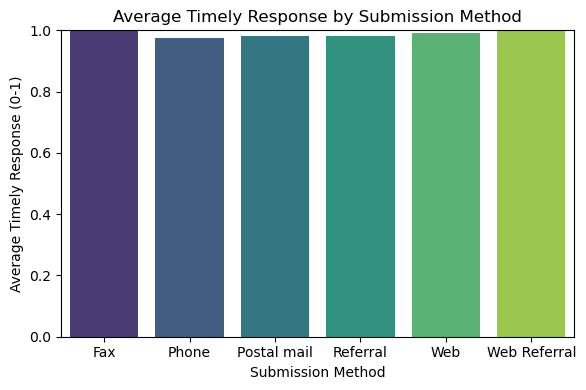

In [8]:
# Average Timely Response by Submission Method

# Filter out rows with missing values in 'Submitted via' or 'Timely response?' columns
df = df.dropna(subset=['Submitted via', 'Timely response?'])

# Convert 'Timely response?' column to binary values (1 for 'Yes', 0 for 'No')
df['Timely response?'] = df['Timely response?'].map({'Yes': 1, 'No': 0})

# Group by 'Submitted via' and calculate the average 'Timely response?' for each submission method
avg_timely_response = df.groupby('Submitted via')['Timely response?'].mean().reset_index()

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x='Submitted via', y='Timely response?', data=avg_timely_response, palette='viridis')
plt.title('Average Timely Response by Submission Method')
plt.xlabel('Submission Method')
plt.ylabel('Average Timely Response (0-1)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

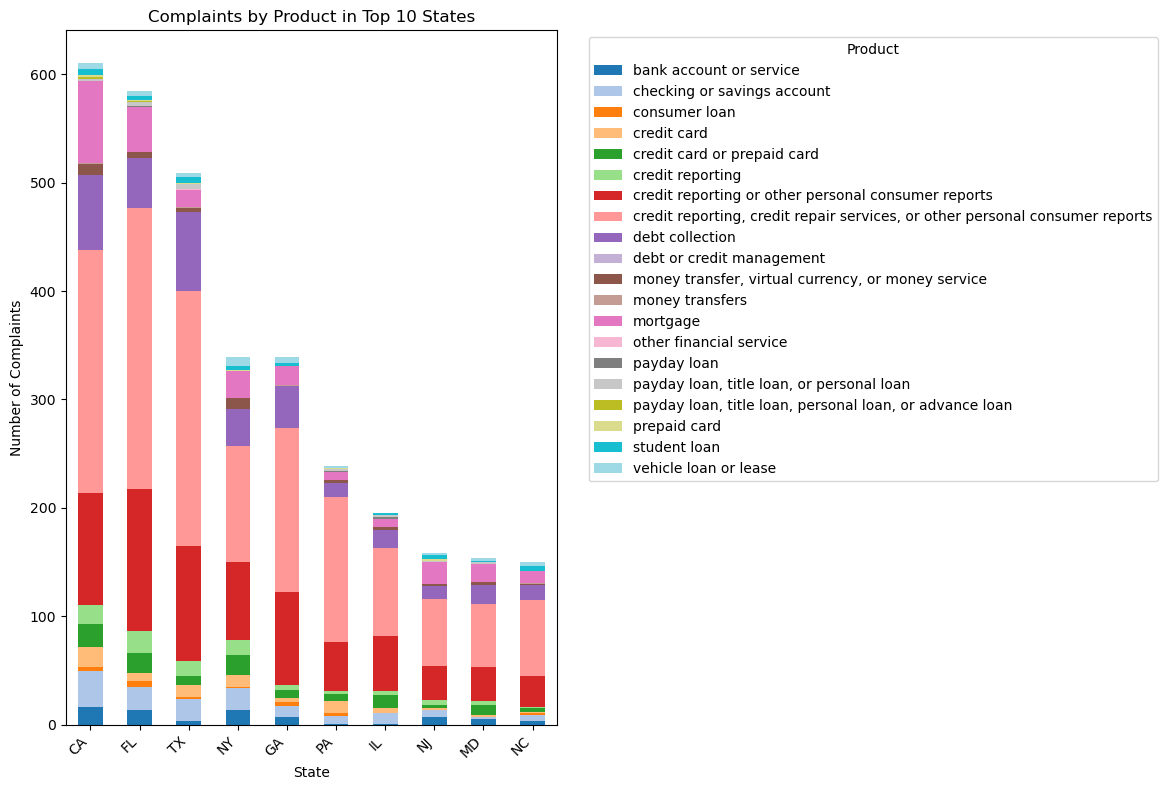

In [80]:
# Group by State and Product
state_product_complaints = df.groupby(['State', 'Product']).size().unstack(fill_value=0)

# Plot the top states with complaints for different products
top_states = state_product_complaints.sum(axis=1).sort_values(ascending=False).head(10).index
state_product_complaints.loc[top_states].plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Complaints by Product in Top 10 States')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 

In [9]:
def lenofLCIS(nums):
    if not nums:
        return 0
    
    max_length = 1
    current_length = 1
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1
    
    return max_length

input_str = input("Enter a list of integers separated by commas: ")
# Convert the input string to a list of integers
nums = list(map(int, input_str.split(",")))

print("The length of the longest continuous increasing subsequence is:", lenofLCIS(nums))


Enter a list of integers separated by commas: 1,5,6,9,2
The length of the longest continuous increasing subsequence is: 4


3. Given a list of non negative integers, arrange them such that they form the largest number.

In [10]:
def largenum(nums):
    # Convert integers to strings
    nums_str = list(map(str, nums))
    
    # Sort the numbers based on the comparison of concatenated strings
    nums_str.sort(key=lambda x: x * 3, reverse=True)
    
    # Handle the case when the list contains only zeros
    if nums_str[0] == "0":
        return "0"
    
    # Return the largest number formed as a string
    return "".join(nums_str)

input_str = input("Enter a list of non-negative integers separated by commas: ")
# Convert the input string to a list of integers
nums = list(map(int, input_str.split(",")))
print("The largest number formed is:", '"' + largenum(nums) + '"')

Enter a list of non-negative integers separated by commas: 2,10
The largest number formed is: "210"


4. Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python.

In [11]:
import json
import csv
import pandas as pd

# Load the JSON data from the file
with open(r"C:\Users\User\Downloads\DT_A1_sample_json.json") as json_file:
    data = json.load(json_file)

# Extract servlet information
servlet_data = [(servlet['servlet-name'], servlet['servlet-class']) for servlet in data['web-app']['servlet']]

# Create a DataFrame
df = pd.DataFrame(servlet_data, columns=['servlet-name', 'servlet-class'])

# Display the DataFrame
print("Data extracted from JSON file:")
print(df)

Data extracted from JSON file:
  servlet-name                    servlet-class
0     cofaxCDS         org.cofax.cds.CDSServlet
1   cofaxEmail       org.cofax.cds.EmailServlet
2   cofaxAdmin       org.cofax.cds.AdminServlet
3  fileServlet        org.cofax.cds.FileServlet
4   cofaxTools  org.cofax.cms.CofaxToolsServlet
